In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os 
import shutil
import numpy as np

In [2]:
PUG_AR4T_PATH = ""

class UnrealDataset(torch.utils.data.Dataset):
    def __init__(self, csv_path, images_folder, transform = None):
        self.df = pd.read_csv(csv_path)
        self.df.astype(str)
        self.images_folder = images_folder
        self.transform = transform

    def __len__(self):
        return len(self.df)
    
    def __getIndicesByFactors__(self, world_name="Egypt", character_label="microphone"):
        indices = dataset.df[
                            (dataset.df['Actor1Category'] == character_label)]                            
        return indices.index.values
    
    def __getitem__(self, index):
        filename = self.df['filepath'][index]
        label = self.df['Actor1Category'][index]
        image = Image.open(os.path.join(self.images_folder, filename))
        if self.transform is not None:
            image = self.transform(image)
        return image, self.df['Level'][index], label

dataset = UnrealDataset(csv_path=PUG_AR4T_PATH+"PUG_ARmerged_test.csv", images_folder=PUG_AR4T_PATH)


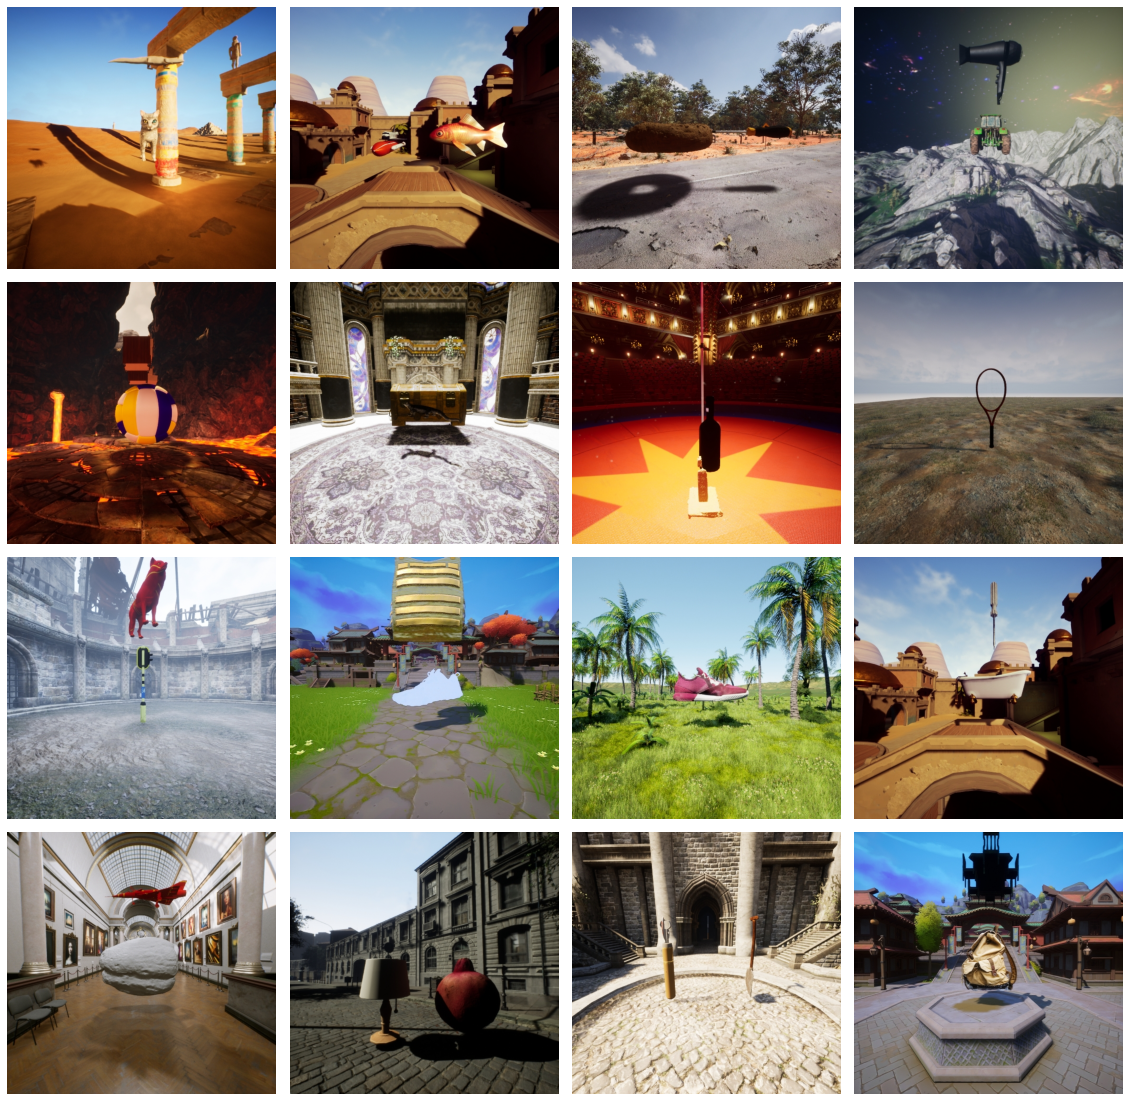

In [8]:
f, axarr = plt.subplots(4,4, figsize=(20,20))
i = 0
j = 0
for k in range(16):
    index = np.random.choice(len(dataset.df), 1)[0]
    data = dataset.__getitem__(index)
    img = data[0]
    axarr[j,i%4].axis('off')
    axarr[j,i%4].imshow(img, aspect="auto")
    i = i + 1
    j = int(i / 4)
f.subplots_adjust(wspace=.05, hspace=.05)
plt.show()